In [32]:
import pybaseball
import pandas as pd
from plottable import Table, ColDef
import matplotlib.pyplot as plt
import numpy as np

In [2]:
stats = pybaseball.pitching_stats(2024)

In [57]:
stats = stats[['Name', 'WAR', 'Pitching+', 'IP', 'SO']].sort_values(by='WAR', ascending=False)[:25]

In [58]:
stats.head()

,Name,WAR,Pitching+,IP,SO
index,,,,,
14,Zack Wheeler,1.4,109,37.1,46
5,Kutter Crawford,1.4,101,33.1,34
6,Ranger Suarez,1.1,102,33.0,32
8,Tanner Houck,1.1,107,32.2,32
11,Dylan Cease,1.0,105,29.2,35


In [59]:
stats['Rank'] = range(1, len(stats) + 1)

order = ['Rank'] + [col for col in stats.columns if col != 'Rank']

stats = stats[order]

In [60]:
def color_3(df, value):
    if value in df.nlargest(3).values:
        return 'green'
    elif value in df.nsmallest(3).values:
        return 'red'
    else:
        return 'white'

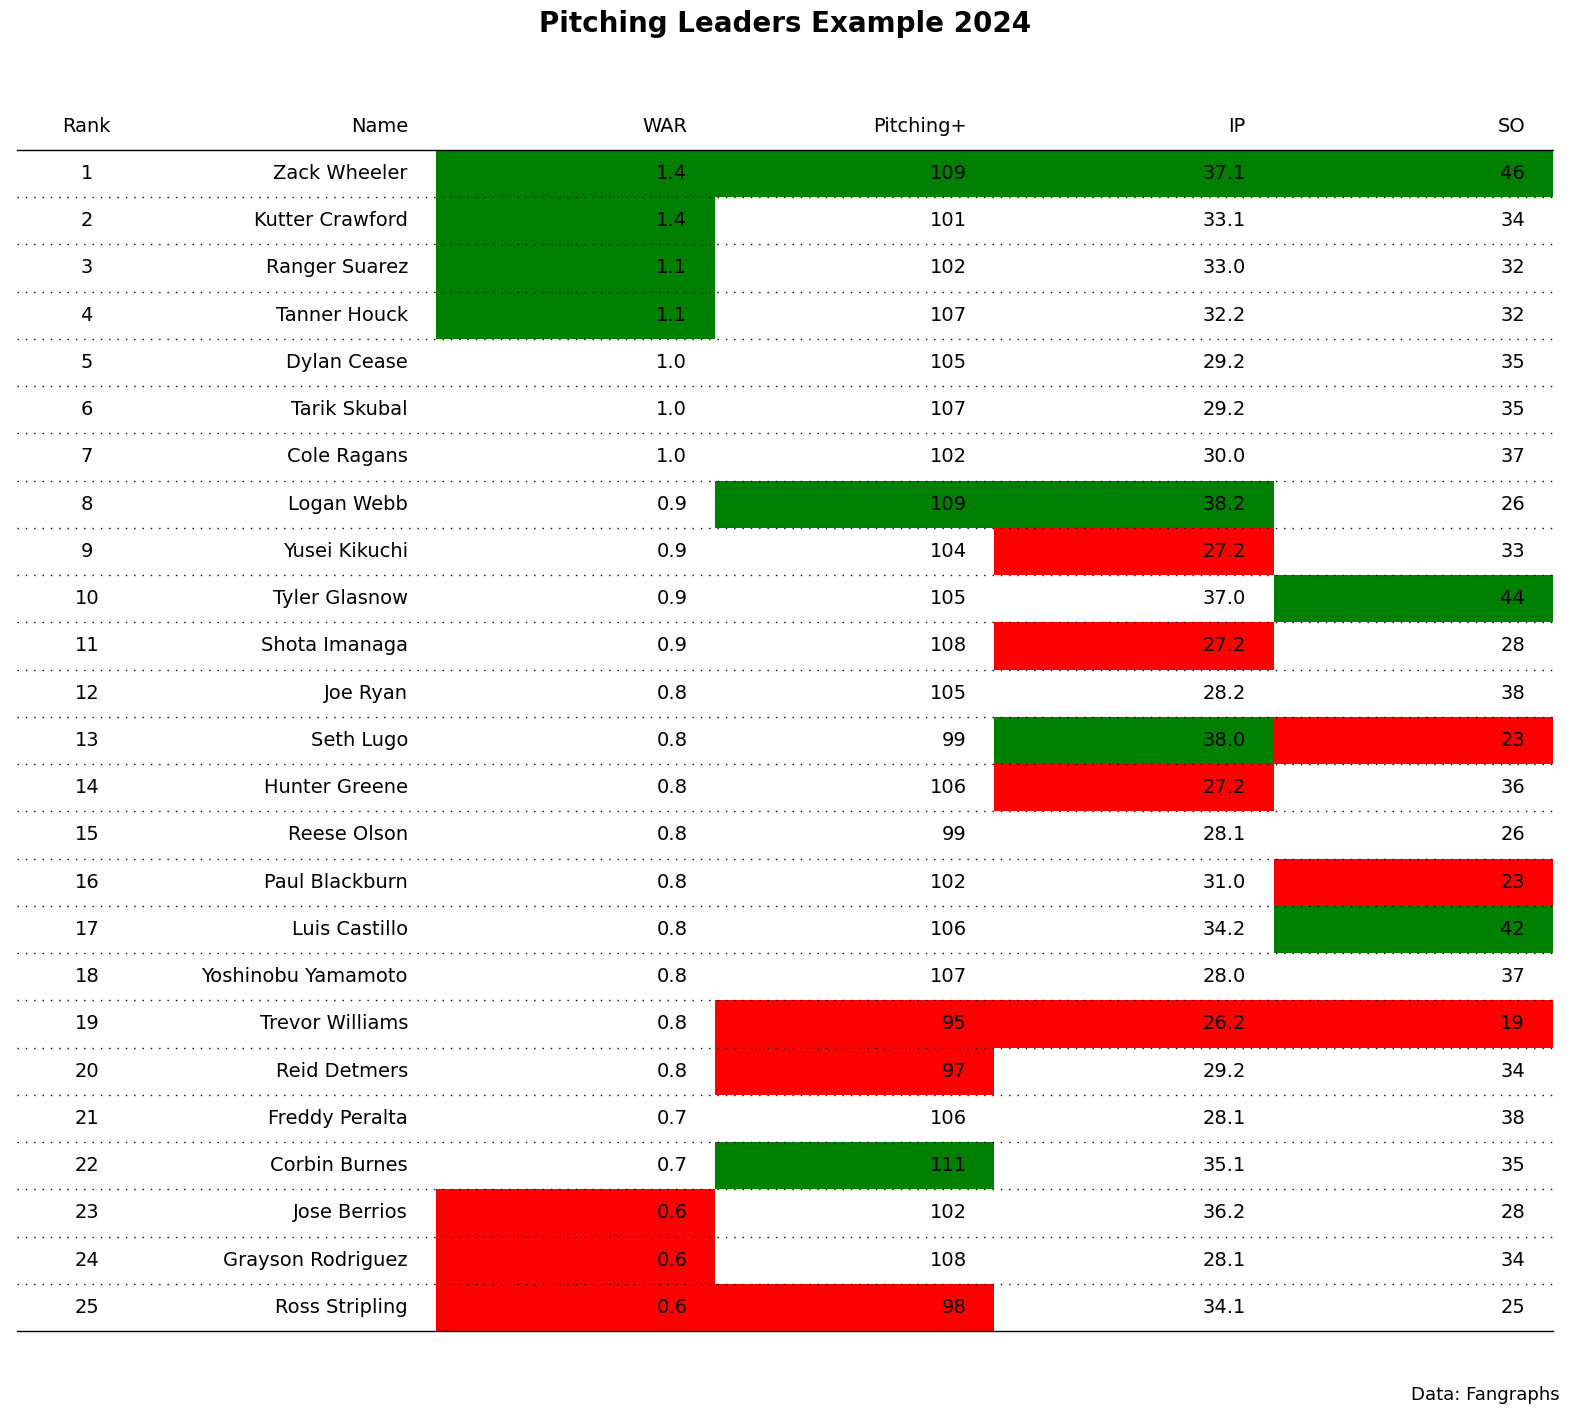

In [62]:
fig, ax = plt.subplots(figsize=(20, 16))

plt.rcParams["font.family"] = ["DejaVu Sans"]
plt.rcParams["savefig.bbox"] = "tight"

col_defs = [
    ColDef('Rank', width = 0.5, textprops={'ha':'center'}),
    ColDef('WAR', cmap = lambda x: color_3(stats['WAR'], x)),
    ColDef('Pitching+', cmap = lambda x: color_3(stats['Pitching+'], x)),
    ColDef('IP', cmap = lambda x: color_3(stats['IP'], x)),
    ColDef('SO', cmap = lambda x: color_3(stats['SO'], x))
]

table = Table(stats, 
              column_definitions = col_defs, 
              row_dividers=True,
              footer_divider=True,
              ax=ax,
              textprops={"fontsize": 14},
              index_col='Rank',
              row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
              col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
              column_border_kw={"linewidth": 1, "linestyle": "-"}
             )


ax.set_title('Pitching Leaders Example 2024', fontfamily='DejaVu Sans', fontsize=20, fontweight='bold', pad = 50)
ax.annotate('Data: Fangraphs', xy = (1.0, -0.05),xycoords='axes fraction', 
            ha='right', va="center", fontsize=13)
plt.show()